# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 6)

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
tesla_df = pd.read_csv(r'Data_files\Google Trends Data Viz (start)\TESLA Search Trend vs Price.csv')

btc_search_df = pd.read_csv(r'Data_files\Google Trends Data Viz (start)\Bitcoin Search Trend.csv')
btc_price_df = pd.read_csv(r'Data_files\Google Trends Data Viz (start)\Daily Bitcoin Price.csv')

unemployment_df = pd.read_csv(r'Data_files\Google Trends Data Viz (start)\UE Benefits Search vs UE Rate 2004-19.csv')

# Google's search rate:
<i> "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term." </i>

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
tesla_df.info()
display(tesla_df[['TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']].agg(['min', 'mean', 'max']))
tesla_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
min,2.00,3.90
mean,8.73,50.96
max,31.00,498.32


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.77
1,2010-07-01,3,3.99
2,2010-08-01,2,3.90


In [4]:
btc_search_df.info()
display(btc_search_df[['BTC_NEWS_SEARCH']].agg(['min', 'mean', 'max']))
btc_search_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


,BTC_NEWS_SEARCH
min,3.00
mean,15.01
max,100.00


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4


In [5]:
btc_price_df.info()
display(btc_price_df[['CLOSE', 'VOLUME']].agg(['min', 'mean', 'max']))
btc_price_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB


,CLOSE,VOLUME
min,178.10,"5,914,570.00"
mean,"4,429.42","8,043,622,390.14"
max,"19,497.40","74,156,772,074.00"


,DATE,CLOSE,VOLUME
0,2014-09-17,457.33,"21,056,800.00"
1,2014-09-18,424.44,"34,483,200.00"
2,2014-09-19,394.80,"37,919,700.00"


In [6]:
unemployment_df.info()
display(unemployment_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].agg(['min', 'mean', 'max']))
unemployment_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


,UE_BENEFITS_WEB_SEARCH,UNRATE
min,14.00,3.70
mean,35.11,6.22
max,100.00,10.00


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.70
1,2004-02,33,5.60
2,2004-03,25,5.80


In [7]:
print(f'Largest value for Tesla in Web Search: {tesla_df['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search: {tesla_df['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [8]:
print(f'Missing values for Tesla?: {tesla_df.isna().any(axis=None)}')
print(f'Missing values for U/E?: {unemployment_df.isna().any(axis=None)}')
print(f'Missing values for BTC Search?: {btc_search_df.isna().any(axis=None)}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [9]:
print(f'Missing values for BTC price?: {btc_price_df.isna().any(axis=None)}')

Missing values for BTC price?: True


In [10]:
print(f'Number of rows with missing values: {btc_price_df.isna().any(axis=1).sum()}')

Number of rows with missing values: 1


In [11]:
btc_price_df.isna().any(axis=1)

0       False
1       False
2       False
        ...  
2201    False
2202    False
2203    False
Length: 2204, dtype: bool

In [12]:
btc_price_df[btc_price_df.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [13]:
btc_price_df.dropna(
    axis=0,
    inplace=True
)

btc_price_df[2147:2149]

,DATE,CLOSE,VOLUME
2147,2020-08-03,"11,246.35","20,271,713,443.00"
2149,2020-08-05,"11,747.02","24,411,254,471.00"


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [14]:
btc_price_df['DATE'] = pd.to_datetime(btc_price_df['DATE'])
btc_price_df.dtypes

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

In [15]:
tesla_df['MONTH'] = pd.to_datetime(tesla_df['MONTH'])
tesla_df.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [16]:
unemployment_df['MONTH'] = pd.to_datetime(unemployment_df['MONTH'])
unemployment_df.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

In [17]:
btc_search_df['MONTH'] = pd.to_datetime(btc_search_df['MONTH'])
btc_search_df.dtypes

MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [50]:
btc_price_df_monthly = btc_price_df.resample(
    rule='MS',
    on='DATE'
).last()

btc_price_df_monthly.reset_index(inplace=True)
btc_price_df_monthly.rename(columns={'DATE': 'MONTH'}, inplace=True)
btc_price_df_monthly

,MONTH,CLOSE,VOLUME
0,2014-09-01,386.94,"34,707,300.00"
1,2014-10-01,338.32,"12,545,400.00"
2,2014-11-01,378.05,"9,194,440.00"
...,...,...,...
70,2020-07-01,"11,323.47","23,160,469,766.00"
71,2020-08-01,"11,680.82","22,285,928,250.00"
72,2020-09-01,"10,912.54","21,226,530,816.00"


# Data Visualisation

### Notebook Formatting & Style Helpers

In [19]:
# Create locators for ticks on the time axis

In [20]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [36]:
tesla_df['MONTH'].min()

Timestamp('2010-06-01 00:00:00')

(0.0, 32.45)

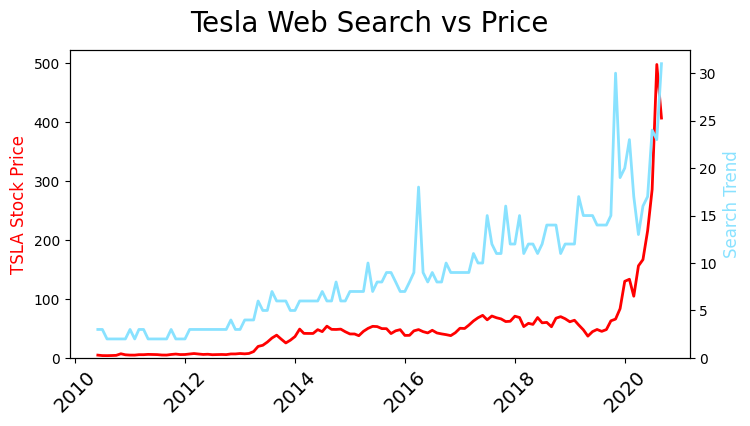

In [69]:
fig, ax1 = plt.subplots(figsize=(8, 4))
fig.suptitle('Tesla Web Search vs Price', fontsize=20)

ax1.plot(
    'MONTH',
    'TSLA_USD_CLOSE',
    data=tesla_df,
    color='red', linewidth=2
)
ax1.set_ylabel('TSLA Stock Price', color='red', fontsize=12)
ax1.tick_params(axis='x', labelsize=14, rotation=45)
ax1.set_ylim(0)
# ax1.set_xlim(tesla_df['MONTH'].min() - pd.DateOffset(years=1))

ax2 = ax1.twinx()
ax2.plot(
    'MONTH',
    'TSLA_WEB_SEARCH',
    data=tesla_df,
    color='#89e2ff', linewidth=2
)
ax2.set_ylabel('Search Trend', color='#89e2ff', fontsize=12)
ax2.set_ylim(0)


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [47]:
btc_price_df_monthly.head(2)

,DATE,CLOSE,VOLUME
0,2014-09-01,386.94,"34,707,300.00"
1,2014-10-01,338.32,"12,545,400.00"


In [48]:
btc_search_df.head(2)

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4


In [51]:
print(btc_price_df_monthly.shape)
print(btc_search_df.shape)

(73, 3)
(73, 2)


In [56]:
full_btc_df = pd.merge(
    btc_price_df_monthly,
    btc_search_df,
    on='MONTH',
    how='inner'
)

print(f'\nNa present: {full_btc_df.isna().any(axis=None)}.\n')
full_btc_df


Na present: False.



,MONTH,CLOSE,VOLUME,BTC_NEWS_SEARCH
0,2014-09-01,386.94,"34,707,300.00",5
1,2014-10-01,338.32,"12,545,400.00",4
2,2014-11-01,378.05,"9,194,440.00",4
...,...,...,...,...
70,2020-07-01,"11,323.47","23,160,469,766.00",14
71,2020-08-01,"11,680.82","22,285,928,250.00",16
72,2020-09-01,"10,912.54","21,226,530,816.00",13


(0.0, 104.85)

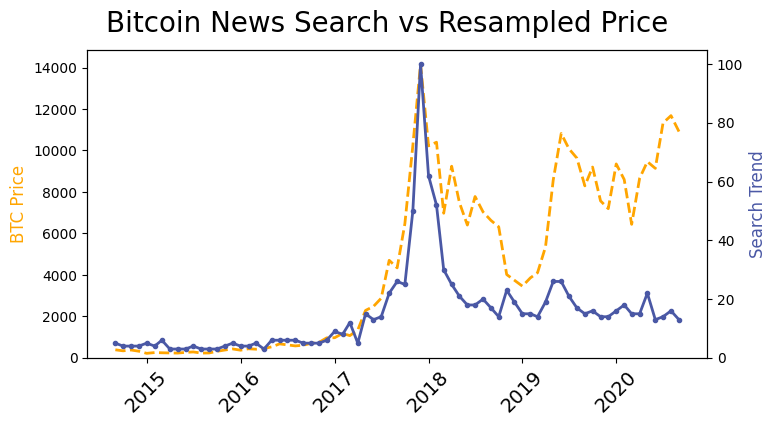

In [71]:
fig, ax1 = plt.subplots(figsize=(8, 4))
fig.suptitle('Bitcoin News Search vs Resampled Price', fontsize=20)

ax1.plot(
    'MONTH',
    'CLOSE',
    data=full_btc_df,
    color='orange', linestyle='--', linewidth=2
)
ax1.set_ylabel('BTC Price', color='orange', fontsize=12)
ax1.tick_params(axis='x', labelsize=14, rotation=45)
ax1.set_ylim(0)

ax2 = ax1.twinx()
ax2.plot(
    'MONTH',
    'BTC_NEWS_SEARCH',
    data=full_btc_df,
    color='#4a58a5', marker='.', linewidth=2
)
ax2.set_ylabel('Search Trend', color='#4a58a5', fontsize=12)
ax2.set_ylim(0)


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?